In [1]:
# Main libraries for implementation and visualization
import numpy as np
import matplotlib.pyplot as plt
# Functions for data generation and splitting into train and test
from sklearn.datasets import make_blobs, make_classification
# Sklearn logistic regression and some functions for comparison
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# My implemented class
from MyLogisticRegression import MyLogisticMulticlass
np.random.seed(0)

In [2]:
X, y = make_blobs(n_samples=1200, centers=3, cluster_std=0.9, random_state=0)

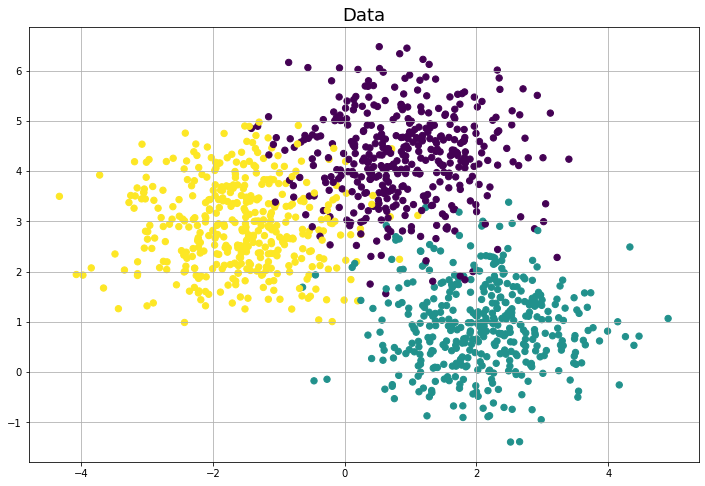

In [3]:
plt.figure(figsize=(12, 8))
plt.title("Data", fontsize=18)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="viridis")
plt.grid()
plt.show()

## Experiments

In [4]:
# Without regularization
logistic_casual = MyLogisticMulticlass()
logistic_casual.fit(X, y)
L_casual = logistic_casual.losses
# With regularization
logistic_l2 = MyLogisticMulticlass(C=0.1)
logistic_l2.fit(X, y)
L_l2 = logistic_l2.losses

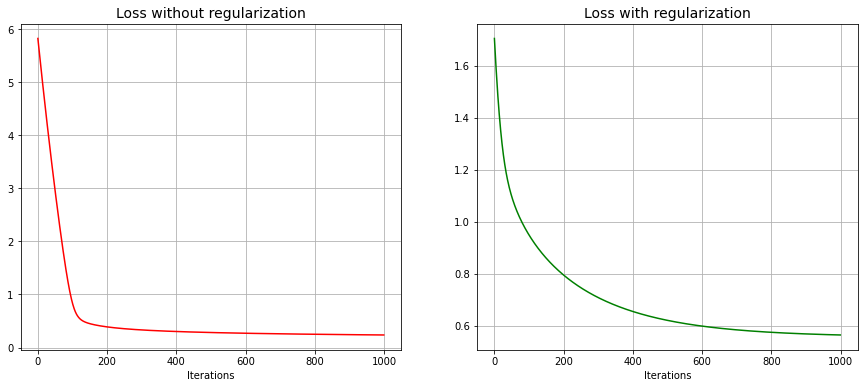

In [5]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.grid()
plt.xlabel("Iterations")
plt.title("Loss without regularization", fontsize=14)
plt.plot(range(len(L_casual)), L_casual, color="red")

plt.subplot(122)
plt.grid()
plt.xlabel("Iterations")
plt.title("Loss with regularization", fontsize=14)
plt.plot(range(len(L_l2)), L_l2, color="green")

plt.show()

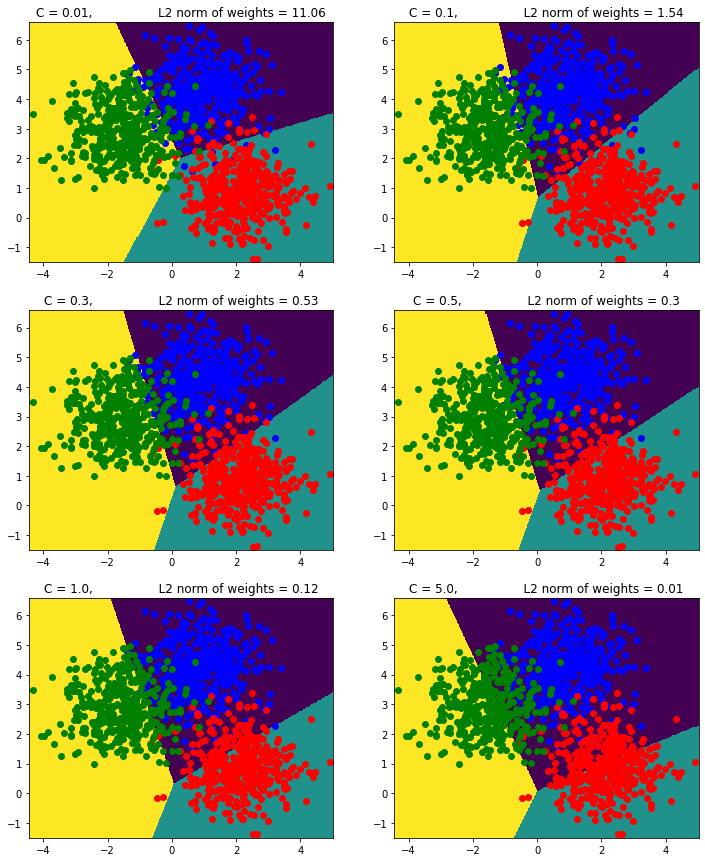

In [6]:
plt.figure(figsize=(12, 15))
C = [0.01, 0.10, 0.30, 0.50, 1.00, 5.00]
for i, c in enumerate(C):
    logistic = MyLogisticMulticlass(C=c)
    logistic.fit(X, y)
    
    eps = 0.1
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps,
                                     np.max(X[:,0]) + eps, 300),
                     np.linspace(np.min(X[:,1]) - eps,
                                 np.max(X[:,1]) + eps, 300))
    
    preds = logistic.predict(np.stack([xx.reshape(-1),
                                       yy.reshape(-1)], axis=1))
    
    preds = preds.reshape(xx.shape)
    
    w_vec = logistic.w
    
    plt.subplot(321 + i)
    
    plt.title(f"C = {c}, \
                L2 norm of weights = {round(np.sum(w_vec * w_vec), 2)}")
    plt.pcolormesh(xx, yy, preds)
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ob")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "or")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "og")

plt.show()

In [7]:
# We see that the results of the model depend on the regularization.
# The common point of three different regions approaches the point (0, 0) as C increases.
# L2 norm of weight matrix decreases with increasing C.

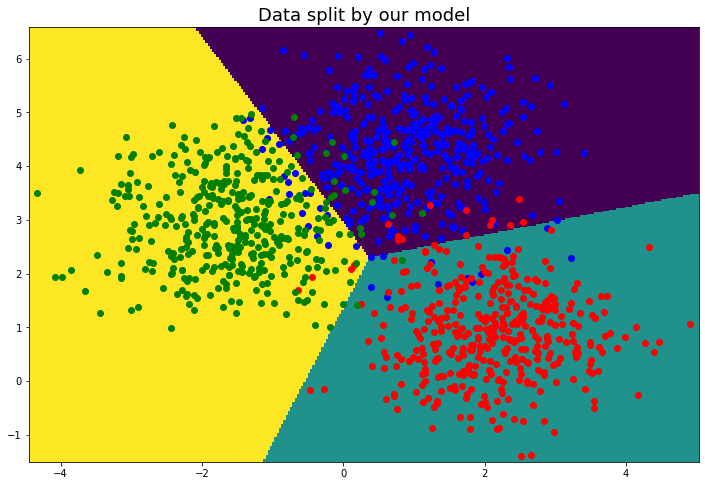

In [8]:
#Let's also see how our model without L2 regularization will split the data.
plt.figure(figsize=(12, 8))

logistic = MyLogisticMulticlass()
logistic.fit(X, y)

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps,
                                 np.max(X[:,0]) + eps, 300),
                 np.linspace(np.min(X[:,1]) - eps,
                             np.max(X[:,1]) + eps, 300))

preds = logistic.predict(np.stack([xx.reshape(-1),
                                   yy.reshape(-1)], axis=1))

preds = preds.reshape(xx.shape)

plt.title("Data split by our model", fontsize=18)
plt.pcolormesh(xx, yy, preds)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ob")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "or")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "og")


plt.show()

## Comparing with sklearn

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [10]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)
print(f"Test accuracy of sklearn is: {accuracy_score(y_test, y_pred_sklearn)}")

Test accuracy of sklearn is: 0.9416666666666667


In [11]:
clf = MyLogisticMulticlass()
clf.fit(X_train, y_train)
y_pred_my = clf.predict(X_test)
print(f"Test accuracy of our model is: {accuracy_score(y_test, y_pred_my)}")

Test accuracy of our model is: 0.9416666666666667


In [12]:
# We see that our model shows a good result. Of course, for a full-fledged
# comparison, one need to train it on larger data, but our goal was to 
# implement logistic regression on numpy.